In [10]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [12]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [14]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/home/satyanveshi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [23]:
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,65,3
1,8,24


In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [2]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

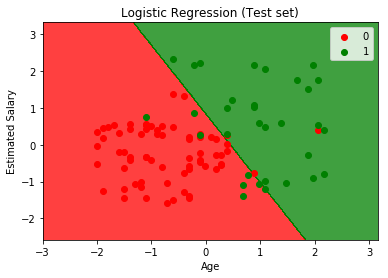

In [11]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [8]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib as mlt 
data = pd.read_csv('headbrain.csv')
print(data)
print(data.shape)


     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]
(237, 4)


In [9]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [14]:
x =data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values
mean_x =np.mean(x)
mean_y = np.mean(y)
n = len(x)
print(n)



237


In [26]:
numer = 0
denom = 0
for i in range(n):
    numer = (x[i]-mean_x)*(y(i)-mean_y)
    denom =((x[i]-mean_x)**2)
b1 = numer/denom;
b0= (mean_y-(b1*mean_x))


TypeError: 'numpy.ndarray' object is not callable

In [20]:
max_x = np.max(x)+100
min_x = np.min(x)-100
x = np.linspace(min_x,min_x,1000)
y = b0+b1*x
plt.plot(x,y,color ='black',label = 'pred')
plt.scatter(x,y,color = 'red', label ='GT')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.lagend()
plt.show()

NameError: name 'b0' is not defined

In [5]:
%matplotlib inline #import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

slope b1 is 2.8
intercept b0 is 6.200000000000001


Text(0, 0.5, 'y')

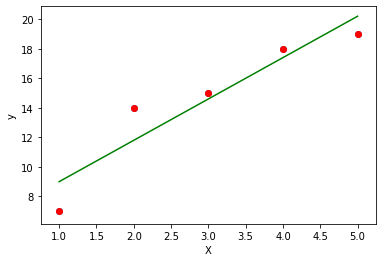

In [7]:
x = np.array([1,2,3,4,5])  #linear regrression 
y = np.array([7,14,15,18,19]) 
n = np.size(x) 
  
x_mean = np.mean(x) 
y_mean = np.mean(y) 
x_mean,y_mean 
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 is', b1) 
print('intercept b0 is', b0) 
  
plt.scatter(x,y) 
plt.xlabel('Independent variable X') 
plt.ylabel('Dependent variable y')
y_pred = b1 * x + b0 
  
plt.scatter(x, y, color = 'red') 
plt.plot(x, y_pred, color = 'green') 
plt.xlabel('X') 
plt.ylabel('y')

In [8]:
#Analyze the performance of the model by calculating mean squared error and R2
error = y - y_pred 
se = np.sum(error**2) 
print('squared error is', se) 
  
mse = se/n  
print('mean squared error is', mse) 
  
rmse = np.sqrt(mse) 
print('root mean square error is', rmse) 
  
SSt = np.sum((y - y_mean)**2) 
R2 = 1- (se/SSt) 
print('R square is', R2) 

squared error is 10.800000000000004
mean squared error is 2.160000000000001
root mean square error is 1.4696938456699071
R square is 0.8789237668161435
